In [1]:
import numpy as np
import pandas as pd


In [2]:
branch_data = pd.read_csv("branch_data.csv")
filtered_branch_data = branch_data[~branch_data['BranchCategory'].str.contains('High School')]
#Create column for total transcations of a row
filtered_branch_data['Total_Transactions'] = filtered_branch_data[['ATM', 'Bill Payment', 'Cash', 'Draft', 'ACH', 'Fee', 'Credit/Debit Card', 'Home Banking', 'Dividend']].sum(axis=1)
print(filtered_branch_data['BranchCategory'].unique())


['Addition Financial Arena' 'Altamonte Springs' 'Apopka' 'Clermont'
 'Downtown Campus' 'East Orlando' 'Eustis' 'Fern Park' 'Kissimmee'
 'Lake Mary' 'Lake Nona' 'Leesburg' 'Longwood' 'Merritt Island'
 'MetroWest' 'Mills' 'Orange City' 'Oviedo' 'Pine Hills' 'Poinciana'
 'Sanford' 'Seminole State' 'South Orlando' 'St. Cloud' 'The Loop'
 'UCF Campus' 'UCF Commons' 'Virtual Branch' 'Winter Garden']


C:\Users\danie\AppData\Local\Temp\ipykernel_59560\3183677653.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branch_data['Total_Transactions'] = filtered_branch_data[['ATM', 'Bill Payment', 'Cash', 'Draft', 'ACH', 'Fee', 'Credit/Debit Card', 'Home Banking', 'Dividend']].sum(axis=1)


In [3]:
branch_category_mapping = {
    'Addition Financial Arena': 'Orange',
    'Altamonte Springs': 'Seminole',
    'Apopka': 'Orange',
    'Clermont': 'Lake',
    'Downtown Campus': 'Orange',
    'East Orlando': 'Orange',
    'Eustis': 'Lake',
    'Fern Park': 'Seminole',
    'Kissimmee': 'Osceola',
    'Lake Mary': 'Seminole',
    'Lake Nona': 'Orange',
    'Leesburg': 'Lake',
    'Longwood': 'Seminole',
    'Merritt Island': 'Brevard',
    'MetroWest': 'Orange',
    'Mills': 'Orange',
    'Orange City': 'Volusia',
    'Oviedo': 'Seminole',
    'Pine Hills': 'Orange',
    'Poinciana': 'Polk',
    'Sanford': 'Seminole',
    'Seminole State': 'Seminole',
    'South Orlando': 'Orange',
    'St. Cloud': 'Osceola',
    'The Loop': 'Osceola',
    'UCF Campus': 'Orange',
    'UCF Commons': 'Orange',
    'Winter Garden': 'Orange'
}

filtered_branch_data['County'] = filtered_branch_data['BranchCategory'].map(branch_category_mapping)

# Convert 'EOM TRANS DATE' to a datetime object for date-based operations
filtered_branch_data['EOM_TRANS_DATE'] = pd.to_datetime(filtered_branch_data['EOM_TRANS_DATE'])



C:\Users\danie\AppData\Local\Temp\ipykernel_59560\1077371473.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branch_data['County'] = filtered_branch_data['BranchCategory'].map(branch_category_mapping)
C:\Users\danie\AppData\Local\Temp\ipykernel_59560\1077371473.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_branch_data['EOM_TRANS_DATE'] = pd.to_datetime(filtered_branch_data['EOM_TRANS_DATE'])


Addition financial and ucf commons are not full, addressed later

In [4]:
#df = pd.merge(filtered_branch_data, merged_df, left_on='County', right_on='NAME', how='inner')
df_relevant = filtered_branch_data.drop(['EOM_TRANS_DATE'],axis = 1)
df_relevant

,BranchCategory,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend,Total_Transactions,County
0,Addition Financial Arena,0,3,0,28,5,20,6,4,14,80,Orange
1,Altamonte Springs,98,394,64,469,1589,416,1642,646,3650,8968,Seminole
2,Apopka,198,540,132,705,2219,560,1983,724,5731,12792,Orange
4,Clermont,143,482,103,499,1940,539,1834,580,4551,10671,Lake
6,Downtown Campus,27,35,12,62,134,78,227,47,275,897,Orange
...,...,...,...,...,...,...,...,...,...,...,...,...
724,St. Cloud,208,623,145,846,3279,779,4750,1269,8096,19995,Osceola
726,The Loop,66,155,68,210,871,287,1206,378,2218,5459,Osceola
728,UCF Campus,30,92,11,153,715,192,839,250,1867,4149,Orange
729,Virtual Branch,56,98,10,325,426,611,1090,455,1285,4356,NaN


In [5]:
df1 = pd.read_csv("Florida_County_Info_-_Sheet1.csv")
df1.rename(columns={'Count': 'County'}, inplace=True)

In [6]:
from io import StringIO

data_comma_separated = """Rank,County,Small Business Establishments,Establishments per 1,000 Residents,Share
1,Santa Rosa,3,209,16.6,99.8%
2,Hendry,681,16.9,99.9%
3,Washington,426,17.1,99.5%
4,Putnam,1,276,17.2,99.8%
5,Madison,314,17.4,100.0%
6,Polk,13,130,17.4,99.7%
7,Jackson,823,17.5,99.5%
8,Hernando,3,657,18.2,99.9%
9,Citrus,2,895,18.3,99.8%
10,Levy,810,18.3,100.0%
11,Pasco,11,112,19.0,99.9%
12,Osceola,7,707,19.1,99.8%
13,Clay,4,263,19.2,99.9%
14,Taylor,403,19.4,99.8%
15,Jefferson,282,19.5,100.0%
16,St. Lucie,6,750,19.6,99.9%
17,Highlands,2,043,19.8,100.0%
18,Marion,7,801,20.3,99.9%
19,Flagler,2,484,20.6,100.0%
20,Columbia,1,452,20.8,99.9%
21,Lake,8,333,21.0,99.9%
22,Okeechobee,868,21.7,99.8%
23,Nassau,2,071,21.9,100.0%
24,Charlotte,4,308,22.1,100.0%
25,Escambia,7,399,22.9,99.9%
26,Alachua,6,509,23.1,99.8%
27,Gulf,343,23.7,99.7%
28,Brevard,15,008,24.3,99.8%
29,Volusia,13,856,24.5,99.9%
30,Manatee,10,377,25.1,99.9%
31,Franklin,309,25.4,100.0%
32,St. Johns,7,692,26.2,99.9%
33,Lee,21,184,26.8,99.9%
34,Leon,7,932,26.8,99.9%
35,Okaloosa,5,789,27.1,99.9%
36,Duval,27,373,27.3,99.7%
37,Bay,4,989,27.8,99.9%
38,Hillsborough,41,277,27.8,99.7%
39,Indian River,4,626,28.2,99.9%
40,Orange,43,056,30.2,99.7%
41,Seminole,14,666,31.1,99.8%
42,Pinellas,30,937,32.3,99.8%
43,Sarasota,15,192,33.9,100.0%
44,Broward,67,026,34.6,99.8%
45,Collier,13,535,35.0,99.9%
46,Miami-Dade,94,470,35.4,99.9%
47,Palm Beach,53,680,35.7,99.9%
48,Walton,2,965,37.1,99.9%
49,Martin,6,041,37.7,99.9%
50,Monroe,4,009,48.7,100.0%"""

# load and display data
df2 = pd.read_csv(StringIO(data_comma_separated))

In [7]:
# merge datasets
merged_data = pd.merge(df1, df2, on="County")

merged_data.rename(columns={'Establishments per 1': 'Establishments per 1000 residents'}, inplace=True)
merged_data = merged_data.drop('000 Residents', axis=1)
merged_data = merged_data.drop('Small Business Establishments', axis=1)



# clean data
columns_to_clean = ['Per Capita Income', 'Median Household Income', 'Median Family Income', 'Number of households', 'Population']

# loop through columns and remove dollar signs and commas
for column in columns_to_clean:
    merged_data[column] = merged_data[column].str.replace('[\$,]', '', regex=True)
    
merged_data['Share'] = pd.to_numeric(merged_data['Share'].str.rstrip('%'), errors='coerce')
merged_data = merged_data.drop(['Rank_x', 'Rank_y'], axis=1)

merged_data = merged_data.set_index('County')
merged_data = merged_data.apply(pd.to_numeric, errors='coerce')
merged_data = merged_data.fillna(0)

merged_data = merged_data.drop(columns='Share')

merged_data

,Per Capita Income,Median Household Income,Median Family Income,Population,Number of households,Total Number of Small Businesses,Number of Credit Unions,Establishments per 1000 residents
County,,,,,,,,
Collier,37046,58106,68556,321520,133179,13535.0,3.0,535.0
St. Johns,36027,62663,79080,190039,75338,7692.0,3.0,692.0
Martin,35772,53210,70271,146318,63899,6041.0,3.0,41.0
Monroe,35516,53821,66152,73090,32629,4009.0,3.0,9.0
Palm Beach,33610,53242,64445,1320134,544227,53680.0,11.0,680.0
Sarasota,33045,49388,62326,379448,175746,15192.0,9.0,192.0
Indian River,31918,47341,57477,138028,60176,4626.0,4.0,626.0
Seminole,29795,58971,70597,422718,164706,14666.0,10.0,666.0
Lee,29445,50014,58950,618754,259818,21184.0,5.0,184.0


In [8]:
df_relevant = pd.merge(df_relevant, merged_data, on='County', how='inner')
df_relevant

,BranchCategory,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend,Total_Transactions,County,Per Capita Income,Median Household Income,Median Family Income,Population,Number of households,Total Number of Small Businesses,Number of Credit Unions,Establishments per 1000 residents
0,Addition Financial Arena,0,3,0,28,5,20,6,4,14,80,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
1,Apopka,198,540,132,705,2219,560,1983,724,5731,12792,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
2,Downtown Campus,27,35,12,62,134,78,227,47,275,897,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
3,East Orlando,165,701,106,836,3325,789,2993,1057,7938,17910,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
4,Lake Nona,53,244,28,293,1119,368,1065,427,2623,6220,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Poinciana,128,138,78,289,460,403,1480,541,2137,5654,Polk,21881,43946,51395,602095,227485,0.0,10.0,130.0
518,Poinciana,99,105,0,260,0,379,1474,290,2148,4755,Polk,21881,43946,51395,602095,227485,0.0,10.0,130.0
519,Poinciana,92,165,86,338,691,381,1393,473,2230,5849,Polk,21881,43946,51395,602095,227485,0.0,10.0,130.0
520,Poinciana,122,221,90,304,454,427,1495,519,2256,5888,Polk,21881,43946,51395,602095,227485,0.0,10.0,130.0


In [9]:
df_relevant['row_number'] = df_relevant.index

# Sort the DataFrame by 'BranchCategory' and 'row_number'
sorted_df = df_relevant.sort_values(by=['BranchCategory', 'row_number'])

# Drop the 'row_number' column if you don't need it in the final DataFrame
df_relevant = sorted_df.drop(columns='row_number')
df_relevant = df_relevant.reset_index(drop=True)
df_relevant

,BranchCategory,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend,Total_Transactions,County,Per Capita Income,Median Household Income,Median Family Income,Population,Number of households,Total Number of Small Businesses,Number of Credit Unions,Establishments per 1000 residents
0,Addition Financial Arena,0,3,0,28,5,20,6,4,14,80,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
1,Addition Financial Arena,1,0,0,18,8,24,14,0,13,78,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
2,Addition Financial Arena,1,0,0,25,2,19,6,2,13,68,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
3,Addition Financial Arena,0,1,0,18,0,16,5,0,12,52,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
4,Addition Financial Arena,0,0,0,20,2,15,5,1,9,52,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Winter Garden,267,452,173,574,1204,537,3481,1025,6698,14411,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
518,Winter Garden,209,269,0,284,0,506,3458,613,6691,12030,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
519,Winter Garden,214,410,145,803,1992,565,3215,989,6874,15207,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0
520,Winter Garden,280,567,185,562,1346,561,3546,1122,6960,15129,Orange,25490,50138,57473,1145956,421847,43056.0,24.0,56.0


Model Accuracy: 0.9238095238095239
                              Feature  Importance
8                            Dividend    0.168664
5                                 Fee    0.146755
9                  Total_Transactions    0.104463
6                   Credit/Debit Card    0.070680
0                                 ATM    0.068637
7                        Home Banking    0.054650
3                               Draft    0.050326
1                        Bill Payment    0.040516
17  Establishments per 1000 residents    0.028934
12               Median Family Income    0.028720
10                  Per Capita Income    0.028102
14               Number of households    0.025929
15   Total Number of Small Businesses    0.024382
2                                Cash    0.024217
11            Median Household Income    0.023906
16            Number of Credit Unions    0.020512
13                         Population    0.020078
4                                 ACH    0.019734
24             

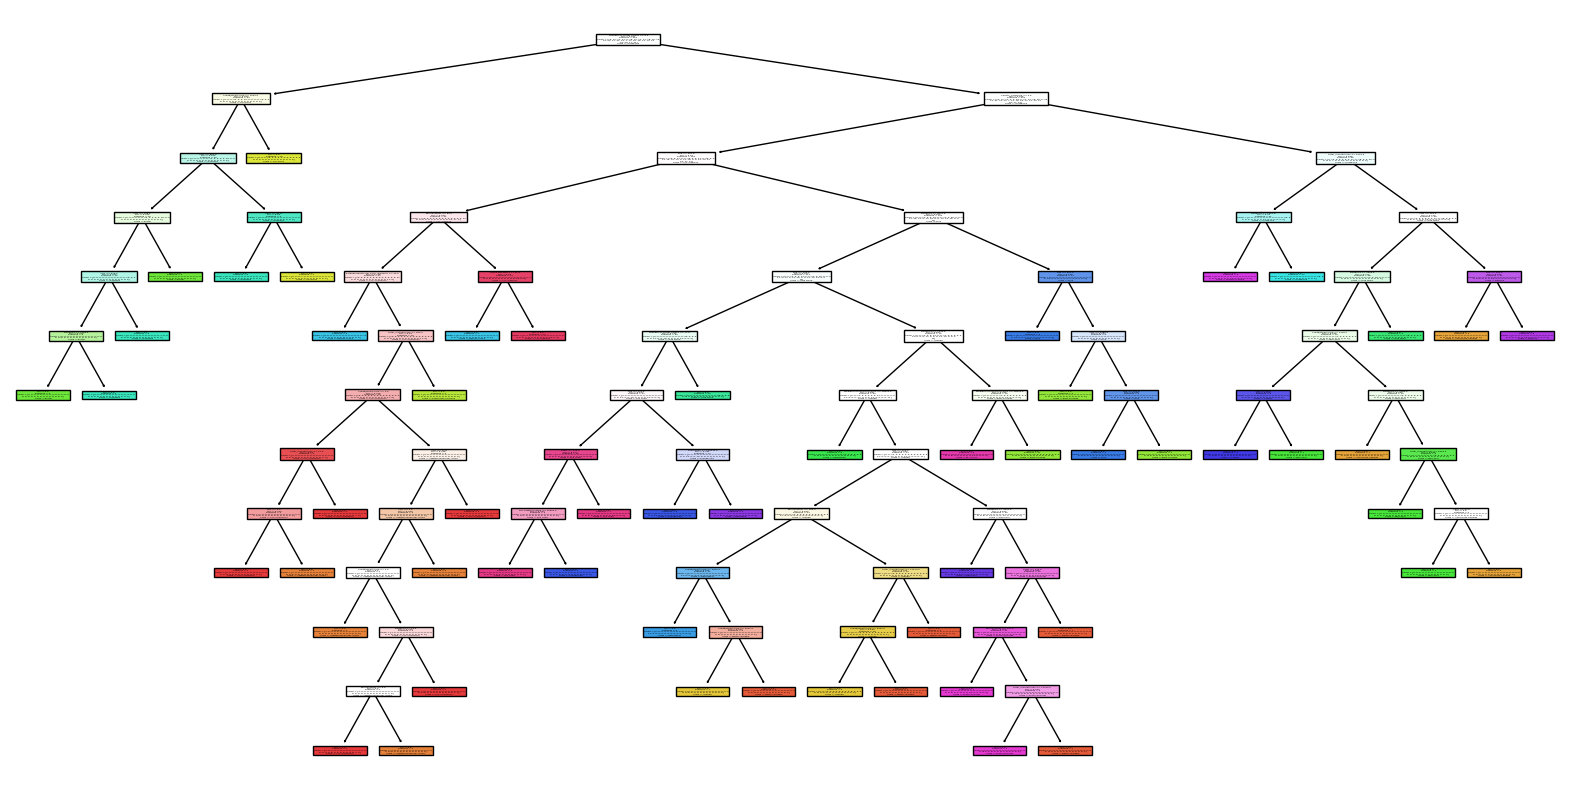

In [10]:
#the following are random forest classifier models with branchCategory as the response, we ignore the overall demand change
#features since each instance of a branch category has the exact same one
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Assuming 'df_relevant' is your DataFrame

# Dummy encode the 'County' column
df_encoded = pd.get_dummies(df_relevant, columns=['County'], drop_first=False)

# Split the data into features (X) and response variable (y)
X = df_encoded.drop(['BranchCategory'], axis=1)
y = df_encoded['BranchCategory']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
# Access the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances in order
print(importance_df)
# Plot the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=X.columns, filled=True, class_names=model.classes_)
plt.show()

In [11]:
#Same model but without 'County', so we use the df without dummy encoding
# Split the data into features (X) and response variable (y)
X = df_relevant.drop(['BranchCategory','County'], axis=1)
y = df_relevant['BranchCategory']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
# Access the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances in order
print(importance_df)

Model Accuracy: 0.9142857142857143
                              Feature  Importance
8                            Dividend    0.163584
5                                 Fee    0.157864
9                  Total_Transactions    0.096193
6                   Credit/Debit Card    0.071719
0                                 ATM    0.070287
7                        Home Banking    0.050287
3                               Draft    0.047930
17  Establishments per 1000 residents    0.041982
1                        Bill Payment    0.040261
12               Median Family Income    0.034913
16            Number of Credit Unions    0.034795
13                         Population    0.033049
10                  Per Capita Income    0.031950
11            Median Household Income    0.031267
2                                Cash    0.026887
15   Total Number of Small Businesses    0.026264
14               Number of households    0.024992
4                                 ACH    0.015776


In [12]:
#k-fold cross validation with 'county'
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Split the data into features (X) and response variable (y)
X = df_encoded.drop(['BranchCategory'], axis=1)
y = df_encoded['BranchCategory']

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X,y)
# Create 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and print the accuracy for each fold
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Accuracy for each fold: {accuracy_scores}")

# Print the average accuracy across all folds
print(f"Average Accuracy: {accuracy_scores.mean()}")

# Access the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances in order
print(importance_df)

Accuracy for each fold: [0.98113208 0.94339623 0.94230769 0.94230769 0.98076923 0.92307692
 0.90384615 0.96153846 0.96153846 0.98076923]
Average Accuracy: 0.9520682148040638
                              Feature  Importance
8                            Dividend    0.161613
5                                 Fee    0.152976
9                  Total_Transactions    0.106216
6                   Credit/Debit Card    0.072928
0                                 ATM    0.067699
1                        Bill Payment    0.047964
7                        Home Banking    0.047784
3                               Draft    0.045878
2                                Cash    0.026995
15   Total Number of Small Businesses    0.026706
12               Median Family Income    0.023436
17  Establishments per 1000 residents    0.022997
10                  Per Capita Income    0.022732
11            Median Household Income    0.022358
16            Number of Credit Unions    0.022087
13                        

In [13]:
#k-fold cross validation without 'county'
# Split the data into features (X) and response variable (y)
X = df_relevant.drop(['BranchCategory','County'], axis=1)
y = df_relevant['BranchCategory']
# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)
model.fit(X,y)
# Create 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and print the accuracy for each fold
accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print(f"Accuracy for each fold: {accuracy_scores}")

# Print the average accuracy across all folds
print(f"Average Accuracy: {accuracy_scores.mean()}")

# Access the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances in order
print(importance_df)

Accuracy for each fold: [1.         0.94339623 0.94230769 0.94230769 0.98076923 0.94230769
 0.90384615 0.94230769 0.94230769 0.98076923]
Average Accuracy: 0.952031930333817
                              Feature  Importance
8                            Dividend    0.172116
5                                 Fee    0.152148
9                  Total_Transactions    0.107781
6                   Credit/Debit Card    0.071116
0                                 ATM    0.069988
7                        Home Banking    0.052065
3                               Draft    0.044178
1                        Bill Payment    0.041271
17  Establishments per 1000 residents    0.038104
11            Median Household Income    0.034429
12               Median Family Income    0.033878
16            Number of Credit Unions    0.032133
10                  Per Capita Income    0.030384
13                         Population    0.030041
15   Total Number of Small Businesses    0.026963
14               Number of 

In [14]:
#new approach only using features with an importance of .05 or higher, k-fold cross validation with 'county'
# Split the data into features (X) and response variable (y)
X = df_encoded.drop(['BranchCategory'], axis=1)
y = df_encoded['BranchCategory']

# Create a Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X, y)

# Access the feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature importances and corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Filter features with importance >= 0.05
important_features = feature_importance_df.loc[feature_importance_df['Importance'] >= 0.05, 'Feature']

# Create a new DataFrame X_important with only important features
X_important = X[important_features]

# Create a new Random Forest Classifier with the important features
model_important = RandomForestClassifier(random_state=42)

# Fit the new model to the important features
model_important.fit(X_important, y)

# Perform cross-validation and print the accuracy for each fold
accuracy_scores = cross_val_score(model_important, X_important, y, cv=cv, scoring='accuracy')
print(f"Accuracy for each fold: {accuracy_scores}")

# Print the average accuracy across all folds
print(f"Average Accuracy: {accuracy_scores.mean()}")

# Access the feature importances of the new model
feature_importances_important = model_important.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df_important = pd.DataFrame({'Feature': important_features, 'Importance': feature_importances_important})

# Sort the DataFrame by importance in descending order
importance_df_important = importance_df_important.sort_values(by='Importance', ascending=False)

# Print the feature importances in order for the new model
print(importance_df_important)
print(X_important.columns)

Accuracy for each fold: [0.96226415 0.88679245 0.94230769 0.90384615 0.96153846 0.90384615
 0.88461538 0.90384615 0.94230769 0.98076923]
Average Accuracy: 0.9272133526850507
              Feature  Importance
8            Dividend    0.340068
5                 Fee    0.281710
9  Total_Transactions    0.158531
6   Credit/Debit Card    0.112823
0                 ATM    0.106867
Index(['Dividend', 'Fee', 'Total_Transactions', 'Credit/Debit Card', 'ATM'], dtype='object')


C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

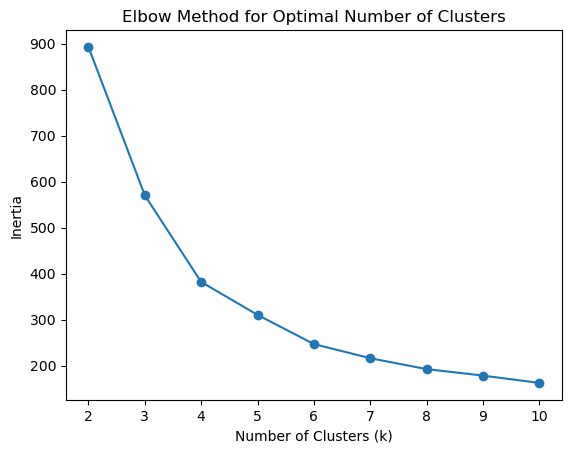

In [15]:
#goign back to the important features found by the random forest classifier, use k-means clustering
#first, determine ideal number of clusters using elbow mthod

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Assuming 'X_important' is your DataFrame with important features

# Standardize the features
scaler = StandardScaler()
# Fit and transform X_important
X_important_scaled_array = scaler.fit_transform(X_important)

# Convert the scaled array back to a DataFrame with the original column names
X_important_scaled = pd.DataFrame(X_important_scaled_array, columns=X_important.columns)
# Initialize an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Define a range of cluster numbers to test
k_values = range(2, 11)

# Iterate through different cluster numbers
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_important_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

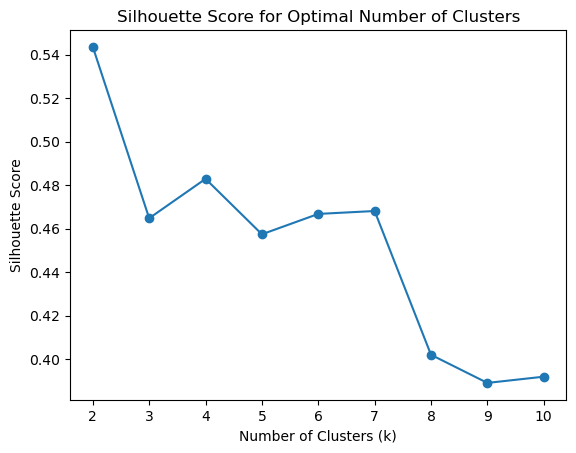

In [16]:
#goign back to the important features found by the random forest classifier, use k-means clustering
#now using silhouette method
# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate through different cluster numbers
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_important_scaled)
    silhouette_scores.append(silhouette_score(X_important_scaled, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


Between the two methods, it seems that k = 4 is a good number of clusters, with a decently clear elbow point local maximum silloutette score

Inertia for k = 4: 381.9352951527073


C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


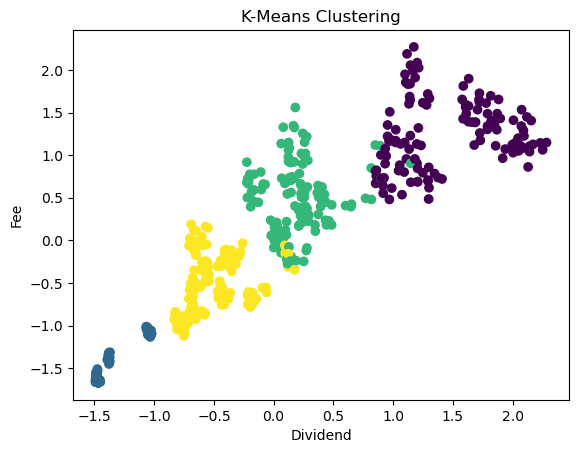

In [17]:
#create kmeans clustering algorithm using k = 4

# Create a KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_important_scaled)

# Add cluster labels to the DataFrame
X_important_scaled['Cluster'] = kmeans.labels_

# Print the inertia value for k = 4 to show the 'success' level
print(f"Inertia for k = 4: {inertia[2]}")

# Visualize the clustering result (for 2D data)
plt.scatter(X_important_scaled.iloc[:, 0], X_important_scaled.iloc[:, 1], c=X_important_scaled['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel(X_important_scaled.columns[0])
plt.ylabel(X_important_scaled.columns[1])
plt.show()

In [18]:
#examine clusters
# Extract the 'cluster' column from 'X_important_scaled'
cluster_column = X_important_scaled['Cluster']


# Merge 'cluster_column' with 'df_relevant' based on the index
df_relevant_important_cluster = pd.merge(df_relevant, cluster_column, left_index=True, right_index=True, how='left')
# Merge 'cluster_column' with 'df_encoded' based on the index
df_encoded = pd.merge(df_encoded, cluster_column, left_index=True, right_index=True, how='left')
df_encoded.rename(columns={'Cluster': 'Cluster (Important)'}, inplace=True)


In [19]:
# Count the occurrences of each cluster for each 'BranchCategory'
cluster_counts_important = df_encoded.groupby(['BranchCategory', 'Cluster (Important)']).size().reset_index(name='count')

# Print the results
print(cluster_counts_important)

              BranchCategory  Cluster (Important)  count
0   Addition Financial Arena                    1     14
1          Altamonte Springs                    2     19
2                     Apopka                    0     14
3                     Apopka                    2      5
4                   Clermont                    2     19
5            Downtown Campus                    1     19
6               East Orlando                    0     19
7                     Eustis                    3     19
8                  Fern Park                    2     13
9                  Fern Park                    3      6
10                 Kissimmee                    0     19
11                 Lake Mary                    2     19
12                 Lake Nona                    3     19
13                  Leesburg                    3     19
14                  Longwood                    3     19
15            Merritt Island                    1     19
16                 MetroWest   

In [20]:
# Group by 'cluster' and calculate the mean for each column
average_by_cluster_important = df_encoded.groupby('Cluster (Important)').mean()

# Print the results
print(average_by_cluster_important)

                            ATM  Bill Payment        Cash       Draft  \
Cluster (Important)                                                     
0                    209.416000    468.800000  108.424000  660.232000   
1                     10.447059     18.247059    6.388235   44.776471   
2                    172.096296    587.392593   93.051852  443.918519   
3                     73.943503    162.694915   37.451977  240.299435   

                             ACH         Fee  Credit/Debit Card  Home Banking  \
Cluster (Important)                                                             
0                    1948.304000  682.472000        3292.344000    963.784000   
1                      78.176471   55.623529         145.317647     46.270588   
2                    1168.244444  506.525926        1935.733333    602.859259   
3                     672.265537  263.355932        1110.723164    347.638418   

                        Dividend  Total_Transactions  ...  \
Cluster (Impo

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

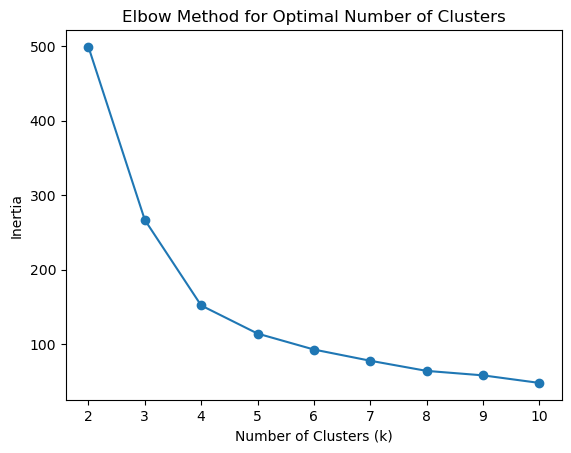

In [21]:
#Same process but with only the 3 most important features, to reduce the curse of dimensionality
top_3_columns = X_important_scaled.columns[:3]
X_important_reduced_scaled = X_important_scaled[top_3_columns]

# Initialize an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Define a range of cluster numbers to test
k_values = range(2, 11)

# Iterate through different cluster numbers
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_important_reduced_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

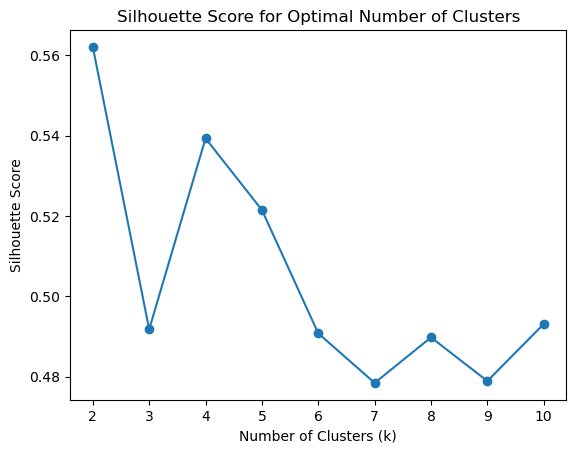

In [22]:
#now using silhouette method
# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Iterate through different cluster numbers
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_important_reduced_scaled)
    silhouette_scores.append(silhouette_score(X_important_reduced_scaled, labels))

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


With the reduced features (Dividend, Fee, Total Transactions), our best value of k is still 4.

C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\danie\AppData\Local\Temp\ipykernel_59560\2044300755.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_important_reduced_scaled['Cluster'] = kmeans.labels_


Inertia for k = 4: 151.75731871983749


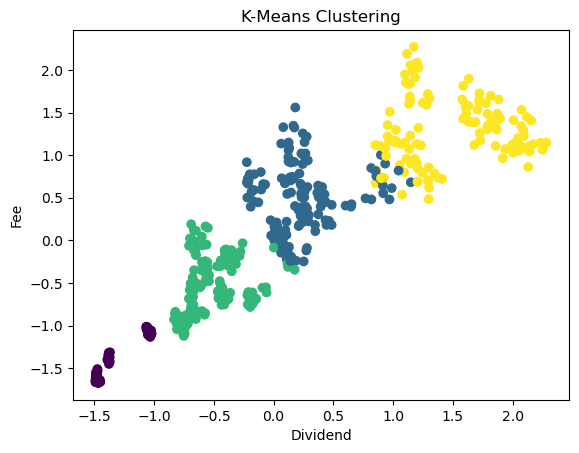

In [23]:
#create kmeans clustering algorithm using k=4
# Create a KMeans clustering model
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed

# Fit the model to the data
kmeans.fit(X_important_reduced_scaled)

# Add cluster labels to the DataFrame
X_important_reduced_scaled['Cluster'] = kmeans.labels_

# Print the inertia value for k = 4, to show the 'success' level
print(f"Inertia for k = 4: {inertia[2]}")

# Visualize the clustering result (for 2D data)
plt.scatter(X_important_reduced_scaled.iloc[:, 0], X_important_reduced_scaled.iloc[:, 1], c=X_important_reduced_scaled['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel(X_important_reduced_scaled.columns[0])
plt.ylabel(X_important_reduced_scaled.columns[1])
plt.show()

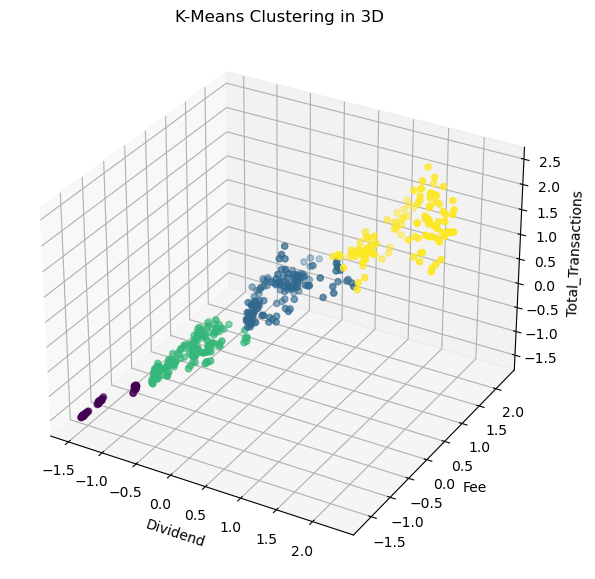

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Visualize the clustering result in 3D
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster colors
scatter = ax.scatter(X_important_reduced_scaled.iloc[:, 0], X_important_reduced_scaled.iloc[:, 1], X_important_reduced_scaled.iloc[:, 2], c=X_important_reduced_scaled['Cluster'], cmap='viridis')

# Add labels and title
ax.set_xlabel(X_important_reduced_scaled.columns[0])
ax.set_ylabel(X_important_reduced_scaled.columns[1])
ax.set_zlabel(X_important_reduced_scaled.columns[2])
ax.set_title('K-Means Clustering in 3D')

plt.show()

We can see the 4 clusters rather clearly

In [25]:
#examine clusters
# Extract the 'cluster' column from 'X_important_reduced_scaled'
cluster_column = X_important_reduced_scaled['Cluster']

# Merge 'cluster_column' with 'df_relevant' based on the index
df_relevant_reduced_cluster = pd.merge(df_relevant, cluster_column, left_index=True, right_index=True, how='left')
df_relevant_reduced_cluster

# Merge 'cluster_column' with 'df_encoded' based on the index
df_encoded = pd.merge(df_encoded, cluster_column, left_index=True, right_index=True, how='left')
df_encoded.rename(columns={'Cluster': 'Cluster (Top 3)'}, inplace=True)

In [26]:
# Count the occurrences of each cluster for each 'BranchCategory'
cluster_counts_top3 = df_encoded.groupby(['BranchCategory', 'Cluster (Top 3)']).size().reset_index(name='count')

# Print the results
print(cluster_counts_top3)

              BranchCategory  Cluster (Top 3)  count
0   Addition Financial Arena                0     14
1          Altamonte Springs                1     18
2          Altamonte Springs                2      1
3                     Apopka                1     12
4                     Apopka                3      7
5                   Clermont                1     19
6            Downtown Campus                0     19
7               East Orlando                3     19
8                     Eustis                2     19
9                  Fern Park                1     15
10                 Fern Park                2      4
11                 Kissimmee                3     19
12                 Lake Mary                1     19
13                 Lake Nona                2     19
14                  Leesburg                2     19
15                  Longwood                2     19
16            Merritt Island                0     19
17                 MetroWest                1 

In [27]:
# Group by 'cluster' and calculate the mean for each column
average_by_cluster_top3 = df_encoded.groupby('Cluster (Top 3)').mean()

# Print the results
print(average_by_cluster_top3)

                        ATM  Bill Payment        Cash       Draft  \
Cluster (Top 3)                                                     
0                 10.447059     18.247059    6.388235   44.776471   
1                174.486111    569.423611   89.902778  440.055556   
2                 74.352273    160.255682   36.579545  233.795455   
3                207.572650    482.846154  114.188034  687.820513   

                         ACH         Fee  Credit/Debit Card  Home Banking  \
Cluster (Top 3)                                                             
0                  78.176471   55.623529         145.317647     46.270588   
1                1133.972222  507.590278        1999.576389    602.361111   
2                 639.676136  262.363636        1122.482955    343.392045   
3                2088.606838  692.606838        3281.786325    993.282051   

                    Dividend  Total_Transactions  ...  \
Cluster (Top 3)                                   ...   
0       

Based on the Cluster (Important) values being close to whole numbers, we can see that our 2 clustering methods yielded very similar results. We will use the Top 3 cluster since the results are similar and a simpler model is prefered. Now analyze by county.

In [28]:
df_encoded

,BranchCategory,ATM,Bill Payment,Cash,Draft,ACH,Fee,Credit/Debit Card,Home Banking,Dividend,...,Establishments per 1000 residents,County_Brevard,County_Lake,County_Orange,County_Osceola,County_Polk,County_Seminole,County_Volusia,Cluster (Important),Cluster (Top 3)
0,Addition Financial Arena,0,3,0,28,5,20,6,4,14,...,56.0,0,0,1,0,0,0,0,1,0
1,Addition Financial Arena,1,0,0,18,8,24,14,0,13,...,56.0,0,0,1,0,0,0,0,1,0
2,Addition Financial Arena,1,0,0,25,2,19,6,2,13,...,56.0,0,0,1,0,0,0,0,1,0
3,Addition Financial Arena,0,1,0,18,0,16,5,0,12,...,56.0,0,0,1,0,0,0,0,1,0
4,Addition Financial Arena,0,0,0,20,2,15,5,1,9,...,56.0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,Winter Garden,267,452,173,574,1204,537,3481,1025,6698,...,56.0,0,0,1,0,0,0,0,0,3
518,Winter Garden,209,269,0,284,0,506,3458,613,6691,...,56.0,0,0,1,0,0,0,0,0,3
519,Winter Garden,214,410,145,803,1992,565,3215,989,6874,...,56.0,0,0,1,0,0,0,0,0,3
520,Winter Garden,280,567,185,562,1346,561,3546,1122,6960,...,56.0,0,0,1,0,0,0,0,0,3


In [29]:
# Extract columns starting with 'County_'
county_columns = df_encoded.filter(like='County_')

# Concatenate 'Cluster (Top 3)' and the selected county columns
concatenated_df = pd.concat([df_encoded['Cluster (Top 3)'], county_columns], axis=1)

# Count occurrences for each county within each 'Cluster (Top 3)'
county_counts = concatenated_df.groupby('Cluster (Top 3)').sum()

# Display the result
print(county_counts)

                 County_Brevard  County_Lake  County_Orange  County_Osceola  \
Cluster (Top 3)                                                               
0                            19            0             47               0   
1                             0           19             54               0   
2                             0           38             38              19   
3                             0            0             79              38   

                 County_Polk  County_Seminole  County_Volusia  
Cluster (Top 3)                                                
0                          0               19               0  
1                          0               71               0  
2                         19               43              19  
3                          0                0               0  


Now rewrite the cluster numbers to be in ascending order based on our top 3 factors (standardized)

In [30]:
# Create a copy of the DataFrame for standardization
df_encoded_copy = df_encoded.copy()

# Select columns for standard scaling
columns_to_scale = top_3_columns

# Standard scale the selected columns in the copy
scaler = StandardScaler()
df_encoded_copy[columns_to_scale] = scaler.fit_transform(df_encoded_copy[columns_to_scale])

In [31]:

# Group by 'Cluster' and calculate the average for each group
cluster_means = df_encoded_copy.groupby('Cluster (Top 3)')[columns_to_scale].mean()

# Rename the clusters based on the average values in ascending order
average_order = cluster_means.mean(axis=1).sort_values().index
cluster_mapping = {cluster: new_cluster for cluster, new_cluster in zip(average_order, range(len(average_order)))}
df_encoded_copy['Cluster (Top 3)'] = df_encoded_copy['Cluster (Top 3)'].map(cluster_mapping)

In [32]:
# Extract columns starting with 'County_'
county_columns = df_encoded_copy.filter(like='County_')

# Concatenate 'Cluster (Top 3)' and the selected county columns
concatenated_df = pd.concat([df_encoded_copy['Cluster (Top 3)'], county_columns], axis=1)

# Count occurrences for each county within each 'Cluster (Top 3)'
county_counts = concatenated_df.groupby('Cluster (Top 3)').sum()

# Display the result
print(county_counts)


                 County_Brevard  County_Lake  County_Orange  County_Osceola  \
Cluster (Top 3)                                                               
0                            19            0             47               0   
1                             0           38             38              19   
2                             0           19             54               0   
3                             0            0             79              38   

                 County_Polk  County_Seminole  County_Volusia  
Cluster (Top 3)                                                
0                          0               19               0  
1                         19               43              19  
2                          0               71               0  
3                          0                0               0  


With some simple math, we can see that the counties with the best performing branches are likely Seminole (average value 1.39), Osceola (2.33), and Orange (1.76). Additionally, for Orange County, the 47 instances in cluster 0 are the Addition Financial Arena, UCF Commons, and UCF Downtown, which are not normal branches. If  we remove those from its cluster score, Orange County now has an average of 2.24. If we look into employment and wage data for those counties, Orange county, compared to Osceola, has nearly 9 times the amount of people employed who also make around 4,000 dollars more per quarter ($16,000 per year). This would lead to the conclusion of expanding with another branch in Orange County.

https://www.floridajobs.org/workforce-statistics/data-center/statistical-programs/quarterly-census-of-employment-and-wages


To see validity of weighting the clusters and showing that branches in cluster 3 are notably better than the others, we can look at the averages of those clusters. We can see below that cluster 3 branches average much higher numbers for the the most relevant differentiators. It is also worth noting that cluster 3 branches are also located in counties that already contain more credit unions. While this may add some validity to the results, it also implies that these areas will have more competition.

In [37]:
#inverse the scaler to see the averages for each cluster
df_encoded_copy[columns_to_scale] = scaler.inverse_transform(df_encoded_copy[columns_to_scale])

# Group by 'cluster' and calculate the mean for each column
average_by_cluster_top3 = df_encoded_copy.groupby('Cluster (Top 3)').mean()

# Print columns excluding those that start with 'County'
filtered_columns = average_by_cluster_top3.filter(regex='^(?!County)')
print(filtered_columns)

                        ATM  Bill Payment        Cash       Draft  \
Cluster (Top 3)                                                     
0                 10.447059     18.247059    6.388235   44.776471   
1                 74.352273    160.255682   36.579545  233.795455   
2                174.486111    569.423611   89.902778  440.055556   
3                207.572650    482.846154  114.188034  687.820513   

                         ACH            Fee  Credit/Debit Card  Home Banking  \
Cluster (Top 3)                                                                
0                  78.176471   13381.934105         145.317647     46.270588   
1                 639.676136   61659.682829        1122.482955    343.392045   
2                1133.972222  118924.769654        1999.576389    602.361111   
3                2088.606838  162129.656780        3281.786325    993.282051   

                     Dividend  Total_Transactions  Per Capita Income  \
Cluster (Top 3)                 